In [1]:
import pandas as pd
import os

In [2]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import loadtxt
import os
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import seaborn as sb

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import joblib
from joblib import dump, load
import pickle
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#To view all columns in DF ,expanded without ellipses
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
Kepler_df=pd.read_csv("cumulative.csv")

In [5]:
Kepler_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
Kepler_df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [7]:
Kepler_df.shape

(9564, 50)

In [8]:
Kepler_df.dtypes

rowid                int64  
kepid                int64  
kepoi_name           object 
kepler_name          object 
koi_disposition      object 
koi_pdisposition     object 
koi_score            float64
koi_fpflag_nt        int64  
koi_fpflag_ss        int64  
koi_fpflag_co        int64  
koi_fpflag_ec        int64  
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2

In [9]:
df = Kepler_df.drop(['koi_tce_delivname'],axis=1)

In [10]:
df.shape

(9564, 49)

In [11]:
!pip install xgboost
!pip install joblib

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['koi_disposition'] = le.fit_transform(df['koi_disposition'])
df['koi_disposition']

df['koi_pdisposition'] = le.fit_transform(df['koi_pdisposition'])
df['koi_pdisposition']

0       0
1       0
2       1
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      1
15      1
16      1
17      1
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      1
29      1
       ..
9534    1
9535    1
9536    1
9537    1
9538    1
9539    0
9540    0
9541    1
9542    0
9543    1
9544    0
9545    1
9546    0
9547    1
9548    1
9549    1
9550    0
9551    0
9552    1
9553    1
9554    1
9555    1
9556    1
9557    0
9558    0
9559    1
9560    1
9561    0
9562    1
9563    1
Name: koi_pdisposition, Length: 9564, dtype: int32

In [13]:
df = df.fillna(0)
df.shape

(9564, 49)

In [14]:
data = df.values
X = data[:, 5:49]
y = data[:, 4]

In [15]:
X.shape

(9564, 44)

In [16]:
y
y=y.astype(int)
y

array([1, 1, 2, ..., 0, 2, 2])

In [17]:
scaled = preprocessing.MinMaxScaler()
scaled_X = scaled.fit_transform(X)
scaled_X

C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 1.        , 0.        , ..., 0.55247338, 0.73383732,
        0.76723491],
       [0.        , 0.969     , 0.        , ..., 0.55247338, 0.73383732,
        0.76723491],
       [1.        , 0.        , 0.        , ..., 0.78434556, 0.73335999,
        0.77168425],
       ...,
       [0.        , 0.497     , 0.        , ..., 0.30440085, 0.67174867,
        0.73773934],
       [1.        , 0.021     , 0.        , ..., 0.65447887, 0.67257754,
        0.76913463],
       [1.        , 0.        , 0.        , ..., 0.78457191, 0.66907089,
        0.74118882]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=42)
X_train.shape

(7173, 44)

In [19]:
#Model1:XGB
# fit model no training data
xgb_model = make_pipeline(StandardScaler(),xgb.XGBClassifier())
xgb_model.fit(X_train, y_train)
print(f'xgb_Accuracy: {xgb_model.score(X_test, y_test)} \n')
print(classification_report(y_test, xgb_model.predict(X_test)))
filename1 = 'xgb_model_koi.sav'
joblib.dump(xgb_model, filename1)

xgb_Accuracy: 0.9155165202843998 

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       567
           1       0.81      0.85      0.83       574
           2       0.99      1.00      0.99      1250

   micro avg       0.92      0.92      0.92      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.92      0.92      0.92      2391



['xgb_model_koi.sav']

In [20]:
#Model2:logisticRegression
#%%time

model_log_reg = make_pipeline(StandardScaler(),LogisticRegression())

model_log_reg.fit(X_train, y_train)

print(f'LR_Accuracy: {model_log_reg.score(X_test, y_test)} \n')
print(classification_report(y_test, model_log_reg.predict(X_test)))
filename2 = 'LR_model_koi.sav'
joblib.dump(model_log_reg, filename2)


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR_Accuracy: 0.8879130071099958 

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       567
           1       0.72      0.87      0.79       574
           2       0.99      1.00      0.99      1250

   micro avg       0.89      0.89      0.89      2391
   macro avg       0.86      0.84      0.84      2391
weighted avg       0.89      0.89      0.89      2391



['LR_model_koi.sav']

In [21]:
#param_grid={
#     'n_estimators':[500,1000,3000],
#     'max_depth':[4,6,8,10,20],
#     'learning_rate':[0.1,0.05,0.02,0.01],
#     'max_features':[1.0,0.3,0.1],
#     'loss':['deviance','exponential']
# }
    # gs_cv = GridSearchCV(GB_model,param_grid,n_jobs=4)
    # gs_cv.fit(X_train,y_train)
    # print(gs_cv.best_params_)

In [22]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
# logreg_cv.fit(X_train,y_train)

# #print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [23]:
#Model3:SVC
#%%time
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(X_train,y_train)
print(f'SVC_Accuracy: {clf.score(X_test, y_test)} \n')
print(classification_report(y_test, clf.predict(X_test)))
filename3 = 'svm_model_koi.sav'
joblib.dump(clf, filename3)


SVC_Accuracy: 0.8352153910497699 

              precision    recall  f1-score   support

           0       0.92      0.36      0.52       567
           1       0.60      0.94      0.73       574
           2       0.99      1.00      0.99      1250

   micro avg       0.84      0.84      0.84      2391
   macro avg       0.84      0.77      0.75      2391
weighted avg       0.88      0.84      0.82      2391



['svm_model_koi.sav']

In [24]:
#model4 = GradientBooster
GB_model = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=10, n_estimators=1000,
                                               min_samples_split=2, min_samples_leaf=10, max_depth=4, min_impurity_decrease=0.0,                                               
                                               min_impurity_split=None, init=None, random_state=None, max_features=0.1, verbose=0)
GB_model.fit(X_train, y_train)

print(f'GB_Accuracy: {GB_model.score(X_test, y_test)} \n')
print(classification_report(y_test, GB_model.predict(X_test)))
filename4 = 'GB_model_koi.sav'
joblib.dump(GB_model, filename4)

GB_Accuracy: 0.3672103722291928 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       567
           1       0.21      0.43      0.28       574
           2       0.53      0.50      0.52      1250

   micro avg       0.37      0.37      0.37      2391
   macro avg       0.25      0.31      0.27      2391
weighted avg       0.33      0.37      0.34      2391



C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['GB_model_koi.sav']

In [25]:
# param_grid={
#     'n_estimators':[500,1000,3000],
#     'max_depth':[4,6,8,10,20],
#     'learning_rate':[0.1,0.05,0.02,0.01],
#     'max_features':[1.0,0.3,0.1],
#     'loss':['deviance','exponential']
# }
# gs_cv = GridSearchCV(GB_model,param_grid,n_jobs=4)
# gs_cv.fit(X_train,y_train)
# print(gs_cv.best_params_)

### There is a very big leap in performance by just using parameter tuning 

In [26]:
#model5 = Gridsearched GradientBooster
GB_best_model = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.02, n_estimators=500,
                                               min_samples_split=2, min_samples_leaf=10, max_depth=4, min_impurity_decrease=0.0,                                               
                                               min_impurity_split=None, init=None, random_state=None, max_features=0.3, verbose=0)
GB_best_model.fit(X_train, y_train)

print(f'GB_best_Accuracy: {GB_best_model.score(X_test, y_test)} \n')
print(classification_report(y_test, GB_best_model.predict(X_test)))
filename5 = 'GB_best_model_koi.sav'
joblib.dump(GB_best_model, filename5)

GB_best_Accuracy: 0.9159347553324969 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       567
           1       0.81      0.85      0.83       574
           2       0.99      1.00      0.99      1250

   micro avg       0.92      0.92      0.92      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.92      0.92      0.92      2391



['GB_best_model_koi.sav']

In [27]:
#Model6:LinearDiscriminantAnalysis
#%%time

model_LDA = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis())

model_LDA.fit(X_train, y_train)

print(f'LDA_Accuracy: {model_LDA.score(X_test, y_test)} \n')
print(classification_report(y_test, model_LDA.predict(X_test)))
filename6 = 'LDA_model_koi.sav'
joblib.dump(model_LDA, filename6)


LDA_Accuracy: 0.8515265579255542 

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       567
           1       0.63      0.94      0.75       574
           2       0.99      1.00      0.99      1250

   micro avg       0.85      0.85      0.85      2391
   macro avg       0.85      0.79      0.78      2391
weighted avg       0.89      0.85      0.84      2391



C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


['LDA_model_koi.sav']

In [28]:
#Model7:MLPClassifier
#%%time

model_MLP = make_pipeline(StandardScaler(),MLPClassifier())

model_MLP.fit(X_train, y_train)

print(f'MLP_Accuracy: {model_MLP.score(X_test, y_test)} \n')
print(classification_report(y_test, model_MLP.predict(X_test)))
filename7 = 'MLP_model_koi.sav'
joblib.dump(model_MLP, filename7)


MLP_Accuracy: 0.9113341698034295 

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       567
           1       0.81      0.84      0.82       574
           2       0.99      1.00      0.99      1250

   micro avg       0.91      0.91      0.91      2391
   macro avg       0.88      0.88      0.88      2391
weighted avg       0.91      0.91      0.91      2391



C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['MLP_model_koi.sav']

In [29]:
#Model8=AdaBoostClassifier
#%%time

model_ABC = make_pipeline(StandardScaler(),AdaBoostClassifier())

model_ABC.fit(X_train, y_train)

print(f'ABC_Accuracy: {model_ABC.score(X_test, y_test)} \n')
print(classification_report(y_test, model_ABC.predict(X_test)))
filename8 = 'ABC_model_koi.sav'
joblib.dump(model_ABC, filename8)

ABC_Accuracy: 0.8837306566290255 

              precision    recall  f1-score   support

           0       0.88      0.62      0.73       567
           1       0.70      0.89      0.79       574
           2       0.99      1.00      0.99      1250

   micro avg       0.88      0.88      0.88      2391
   macro avg       0.86      0.84      0.84      2391
weighted avg       0.89      0.88      0.88      2391



['ABC_model_koi.sav']

In [30]:
#Model9=RandomForestClassifier
#%%time

model_RFC = make_pipeline(StandardScaler(),RandomForestClassifier())

model_RFC.fit(X_train, y_train)

print(f'RFC_Accuracy: {model_ABC.score(X_test, y_test)} \n')
print(classification_report(y_test, model_RFC.predict(X_test)))
filename9 = 'RFC_model_koi.sav'
joblib.dump(model_RFC, filename9)

C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC_Accuracy: 0.8837306566290255 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       567
           1       0.80      0.76      0.78       574
           2       0.99      1.00      0.99      1250

   micro avg       0.90      0.90      0.90      2391
   macro avg       0.86      0.86      0.86      2391
weighted avg       0.90      0.90      0.90      2391



['RFC_model_koi.sav']

### Grid searching for best Hyperparameters for all 9 models

In [ ]:
# from sklearn.base import BaseEstimator
# #from sklearn.model_selection import GridSearchCV
# names = [
#          "LogisticRegression",
#          "XGBClassifier",
#          "LinearDiscriminantAnalysis",
#          "MLPClassifier",
#          "AdaBoostClassifier",
#          "RandomForestClassifier"
#         ]

# class DummyEstimator(BaseEstimator):
#     def fit(self): pass
#     def score(self): pass

# # Create a pipeline
# pipe = Pipeline([('clf', DummyEstimator())]) # Placeholder Estimator

# # Candidate learning algorithms and their hyperparameters
# search_space = [{'clf': [LogisticRegression()], # Actual Estimator
#                  'clf__penalty': ['l1', 'l2'],
#                  'clf__C': np.logspace(0, 4, 10)},

#                 {'clf': [XGBClassifier()],  
#                  'max_depth':range(3,10,2),
#                  'min_child_weight':range(1,6,2)},
                
#                 {'clf': [LinearDiscriminantAnalysis()], 
#                  'solver': ['svd', 'lsqr','eigen'],
#                  'shrinkage':['None','auto']},

#                 {'clf': [MLPClassifier()], 
#                  'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#                  'activation': ['tanh', 'relu'],
#                  'solver': ['sgd', 'adam'],
#                  'alpha': [0.0001, 0.05],
#                  'learning_rate': ['constant','adaptive']},
                
#                 {'clf': [AdaBoostClassifier()], 
#                  'n_estimators': [50, 100],
#                  'learning_rate' : [0.01,0.05,0.1,0.3,1],
#                  'loss' : ['linear', 'square', 'exponential']},

#                 {'clf': [RandomForestClassifier()],  
#                  'bootstrap': [True, False],
#                  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#                  'max_features': ['auto', 'sqrt'],
#                  'min_samples_leaf': [1, 2, 4],
#                  'min_samples_split': [2, 5, 10],
#                  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]               


# # Create grid search 
# #gs = GridSearchCV(pipe, search_space)
# gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
#     clf = gs_clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print("{} score: {}".format(name, score))

In [33]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    XGBClassifier(),
    #SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    MLPClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    results = clf.predict(X_test)
    acc = accuracy_score(y_test,results)
    print("Accuracy: {:.4%}".format(acc))
    
    results = clf.predict_proba(X_test)
    ll = log_loss(y_test, results)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
****Results****
Accuracy: 87.1184%
Log Loss: 0.28425584124319736
XGBClassifier
****Results****
Accuracy: 91.5935%
Log Loss: 0.19934165504957646


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 90.2969%
Log Loss: 0.49517553212029514
AdaBoostClassifier
****Results****
Accuracy: 88.3731%
Log Loss: 0.6627978009731527
GradientBoostingClassifier
****Results****
Accuracy: 91.4680%
Log Loss: 0.2023494541584086
LinearDiscriminantAnalysis
****Results****
Accuracy: 85.1527%
Log Loss: 0.5431055505016605


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


MLPClassifier
****Results****
Accuracy: 90.1715%
Log Loss: 0.22126664419179937


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


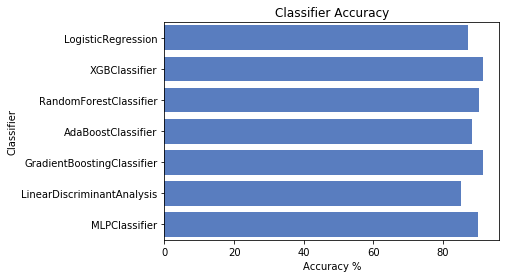

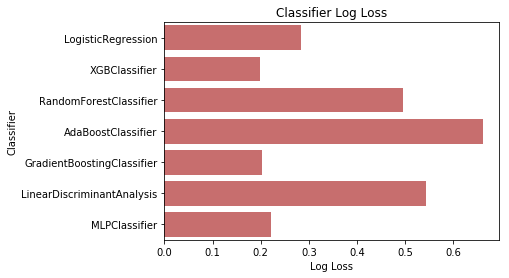

In [36]:
# Visual comparison of Models
sb.set_color_codes("muted")
sb.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sb.set_color_codes("muted")
sb.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
# Logarithmic loss (related to cross-entropy) measures the performance of a classification model
# where the prediction input is a probability value between 0 and 1. 
# The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0.
# Log loss increases as the predicted probability diverges from the actual label.

In [37]:
# Use three Classifiers based on Max Accuracy and Min Log Loss for stacking through Ensemble
#XGB, GradientBoostingclassifier, MLPClassifier

In [38]:
xgb_model=joblib.load('./xgb_model_koi.sav')
MLP_model=joblib.load('./MLP_model_koi.sav')
GB_best_model=joblib.load('./GB_best_model_koi.sav')


In [39]:
xgb_model_results=xgb_model.predict(X_test)
print(xgb_model_results)

[2 2 2 ... 1 1 2]


In [40]:
MLP_model_results=MLP_model.predict(X_test)
print(MLP_model_results)

[2 2 2 ... 1 1 2]


In [41]:
GB_best_model_results= GB_best_model.predict(X_test)
print(GB_best_model_results)

[2 2 2 ... 0 1 2]


In [43]:
!pip install vecstack
from vecstack import stacking

  Stored in directory: C:\Users\Mrinalini\AppData\Local\pip\Cache\wheels\35\6d\ca\bce17942bcf7c267b13c97c9c95e2f0ecf0b42160e6074f448
Successfully built vecstack


In [44]:
models = [
    MLPClassifier(),
        
    GradientBoostingClassifier(),
        
    XGBClassifier()
]

In [45]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [MLPClassifier]


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  0:  [0.89025070]
    fold  1:  [0.87451199]


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  2:  [0.90016732]


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  3:  [0.89341518]
    ----
    MEAN:     [0.88958630] + [0.00941136]
    FULL:     [0.88958595]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.91420613]
    fold  1:  [0.91411043]
    fold  2:  [0.91243726]
    fold  3:  [0.91964286]
    ----
    MEAN:     [0.91509917] + [0.00271597]
    FULL:     [0.91509829]

model  2:     [XGBClassifier]
    fold  0:  [0.91364903]
    fold  1:  [0.90909091]
    fold  2:  [0.91578360]
    fold  3:  [0.92020089]
    ----
    MEAN:     [0.91468111] + [0.00399997]
    FULL:     [0.91468005]



In [48]:
xgb_model_level2 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
xgb_model_level2 = xgb_model_level2.fit(S_train, y_train)

y_pred = xgb_model_level2.predict(S_test)

print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


Final prediction score: [0.91551652]


In [53]:
print(classification_report(y_test, xgb_model_level2.predict(S_test)))
filename = 'xgb_model_level2.sav'
joblib.dump(xgb_model_level2, filename)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       567
           1       0.82      0.83      0.82       574
           2       0.99      1.00      0.99      1250

   micro avg       0.92      0.92      0.92      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.91      0.92      0.92      2391



['xgb_model_level2.sav']

In [51]:
model_MLP_level2 = make_pipeline(StandardScaler(),MLPClassifier())

model_MLP_level2 = model_MLP_level2.fit(S_train, y_train)
y_pred = model_MLP_level2.predict(S_test)

print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))



C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Final prediction score: [0.91551652]


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
print(classification_report(y_test,model_MLP_level2.predict(S_test)))
filename = 'model_MLP_level2.sav'
joblib.dump(model_MLP_level2, filename)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       567
           1       0.82      0.83      0.82       574
           2       0.99      1.00      0.99      1250

   micro avg       0.92      0.92      0.92      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.91      0.92      0.92      2391



C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


['model_MLP_level2.sav']

In [55]:
GB_best_model_level2 = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.02, n_estimators=500,
                                               min_samples_split=2, min_samples_leaf=10, max_depth=4, min_impurity_decrease=0.0,                                               
                                               min_impurity_split=None, init=None, random_state=None, max_features=0.3, verbose=0)
GB_best_model_level2 = GB_best_model_level2.fit(S_train, y_train)

y_pred = GB_best_model_level2.predict(S_test)

print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))


Final prediction score: [0.91509829]


In [56]:
print(classification_report(y_test,GB_best_model_level2.predict(S_test)))
filename = 'GB_best_model_level2.sav'
joblib.dump(GB_best_model_level2, filename)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       567
           1       0.81      0.84      0.83       574
           2       0.99      1.00      0.99      1250

   micro avg       0.92      0.92      0.92      2391
   macro avg       0.89      0.88      0.88      2391
weighted avg       0.91      0.92      0.91      2391



['GB_best_model_level2.sav']

### We get Marginally Higher Accuracy after stacking in all three models

In [63]:
xgb_model_level2=joblib.load('./xgb_model_level2.sav')
MLP_model_level2=joblib.load('./model_MLP_level2.sav')
GB_best_model_level2=joblib.load('./GB_best_model_level2.sav')

In [65]:
GB_best_model_level2_results= GB_best_model_level2.predict(S_test)
print(GB_best_model_level2_results)

[2 2 2 ... 1 1 2]


In [66]:
MLP_model_level2_results= MLP_model_level2.predict(S_test)
print(MLP_model_level2_results)

[2 2 2 ... 0 1 2]


C:\ProgramData\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
xgb_model_level2_results= xgb_model_level2.predict(S_test)
print(xgb_model_level2_results)

[2 2 2 ... 0 1 2]


In [68]:
%pwd

'C:\\Users\\Mrinalini\\Desktop\\ML_HW\\ExoHW\\KeplerML_HW'